In [1]:
from nearline_helpers import *
%jsroot on

import ROOT as r
import os

Welcome to JupyROOT 6.26/10


# Load Data

In [3]:
#indir = "/home/pioneer/dqm/example_data/"
#indir = '/home/pioneer/dqm/unpacking/bin/run302/'
indir = '/home/pioneer/dqm/nearline/'
#indir = '/home/pioneer/kolja/test-beam-2023-unpacker/bin'
runs = [1623]

ch = load_chain(runs,indir)
#ch = r.TChain("tree")
#for run in runs:
#    pathi = os.path.join(indir,f'*{run}_*root')
#    ch.Add(pathi)
ch.GetEntries()

amcs = [1,2]
channelTags = [0,1,2,3,4]

Warning in <TClass::Init>: no dictionary for class dataProducts::ChannelConfig is available
Warning in <TClass::Init>: no dictionary for class dataProducts::LinearCalibrationHolder is available
Warning in <TClass::Init>: no dictionary for class dataProducts::NonLinearCalibrationHolder is available
Warning in <TFile::Init>: file /home/pioneer/dqm/nearline/nearline_hists_run01623_00080.root probably not closed, trying to recover
Info in <TFile::Recover>: /home/pioneer/dqm/nearline/nearline_hists_run01623_00080.root, recovered key vector<dataProducts::ChannelConfig>:channelConfigs at address 318
Info in <TFile::Recover>: /home/pioneer/dqm/nearline/nearline_hists_run01623_00080.root, recovered key dataProducts::ODB:odb at address 2390
Info in <TFile::Recover>: /home/pioneer/dqm/nearline/nearline_hists_run01623_00080.root, recovered key TProcessID:ProcessID0 at address 33779
Info in <TFile::Recover>: /home/pioneer/dqm/nearline/nearline_hists_run01623_00080.root, recovered key TTree:tree at 

How many events should be plotted?

In [4]:
nevents = 2

# t0 waveforms

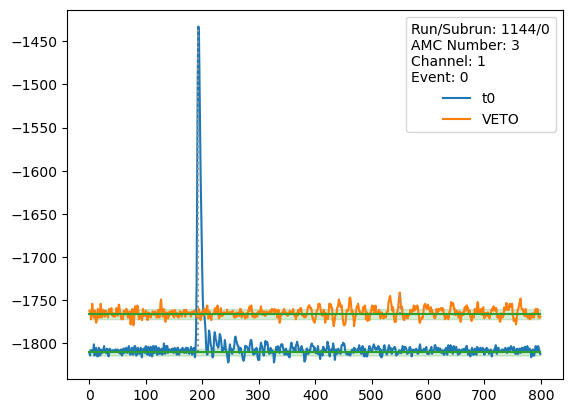

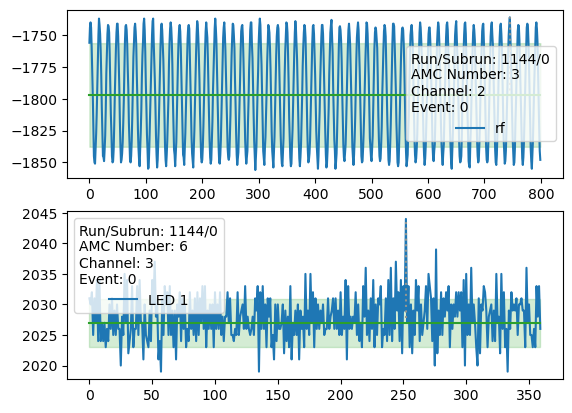

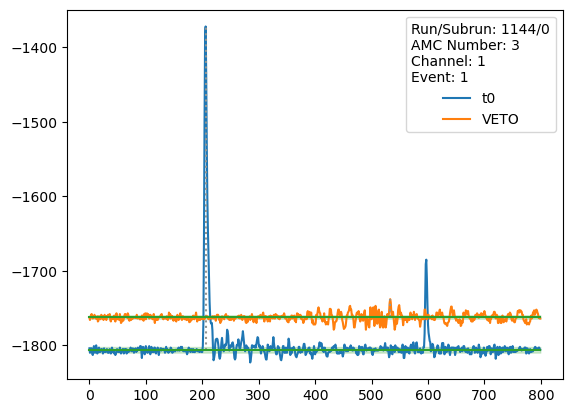

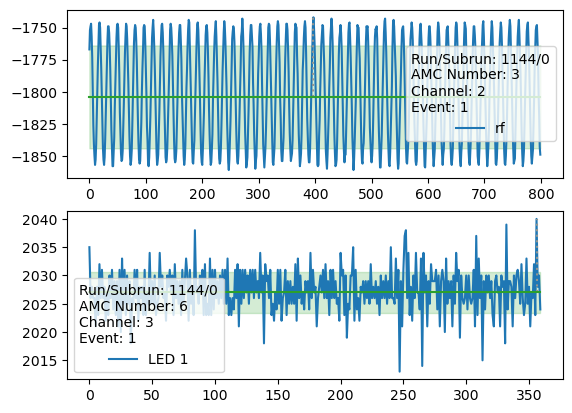

In [5]:
for i in range(nevents):
    ch.GetEvent(i)
    figt0, axt0  = plt.subplots()
    figr,axr  = plt.subplots(2)

    plot_waveform(ch.t0_waveforms[0],axt0,"t0")
    plot_waveform(ch.t0_waveforms[1],axt0,"VETO")
    plot_waveform(ch.t0_waveforms[2],axr[0],"rf")
    plot_waveform(ch.t0_waveforms[3],axr[1],"LED 1")
    #plot_waveform(ch.t0_waveforms[4],axr[1],"LED 2")
    



# LYSO Waveforms

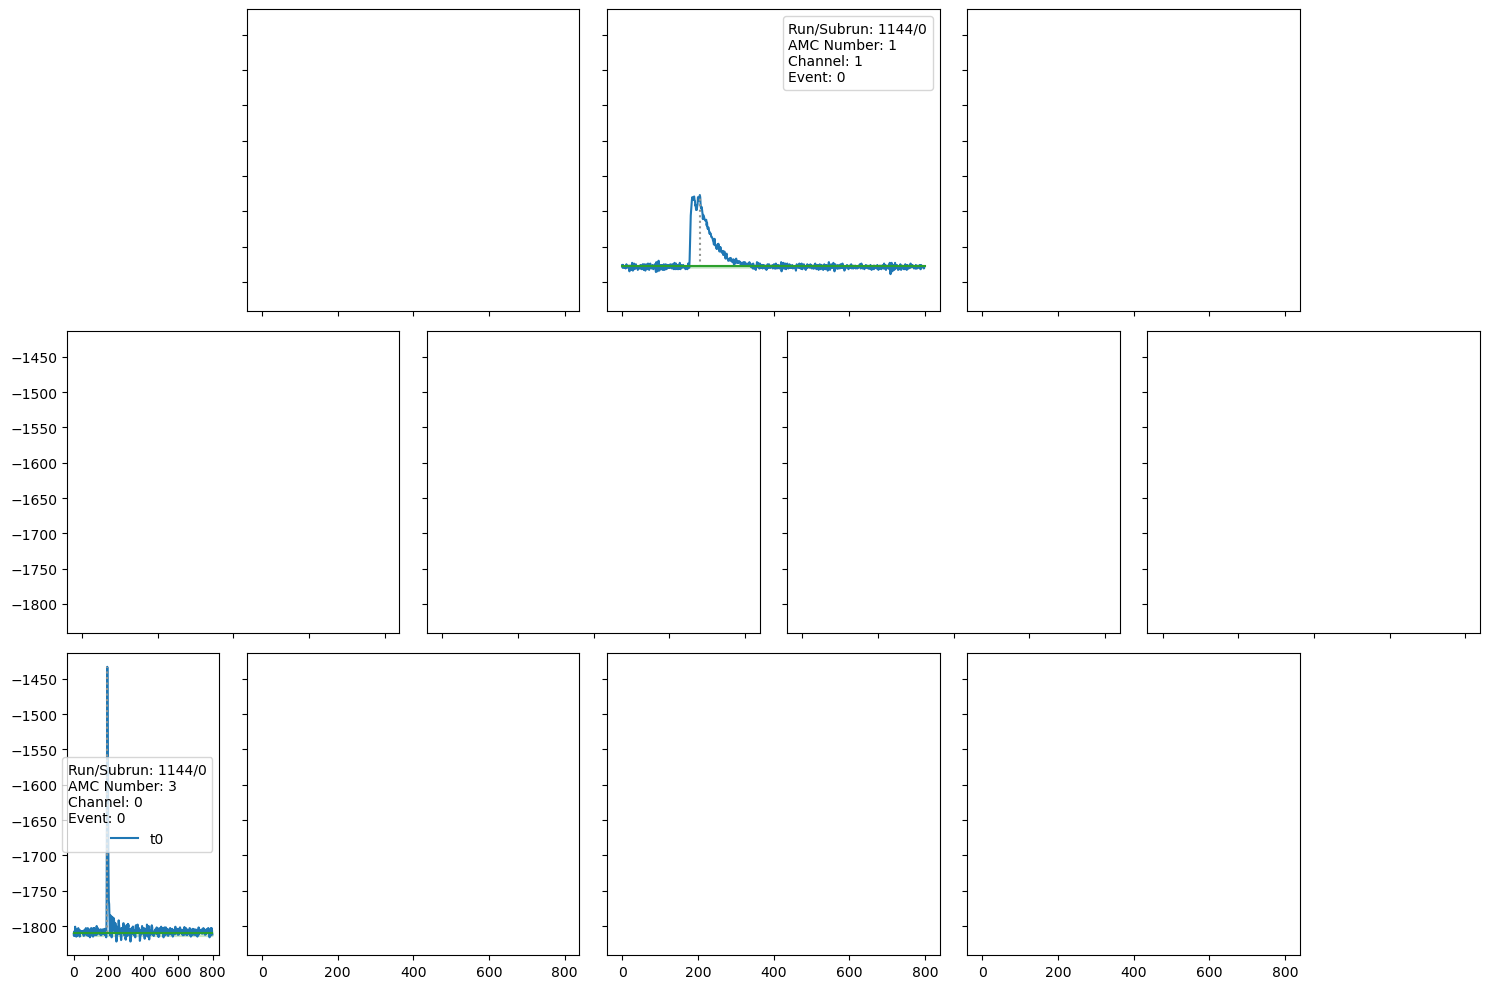

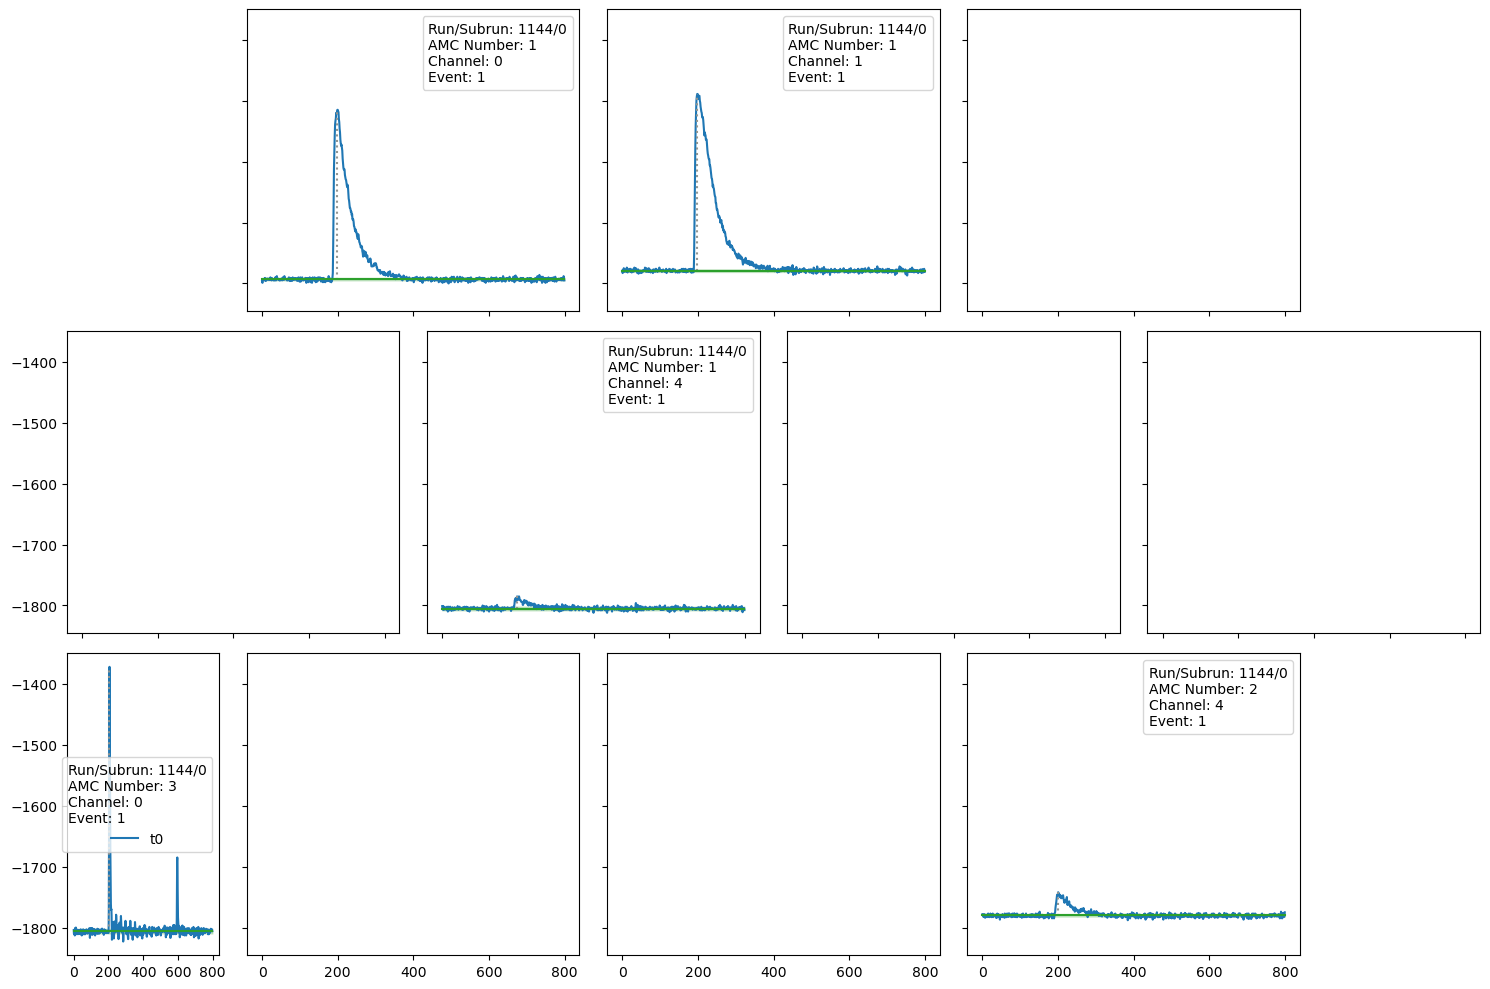

In [6]:
for i in range(nevents):
    ch.GetEvent(i)

    fig,ax = plot_event_wf(ch.lyso_waveforms)
    plot_waveform(ch.t0_waveforms[0],ax['Z'],"t0")

# LYSO Integrals (per event)

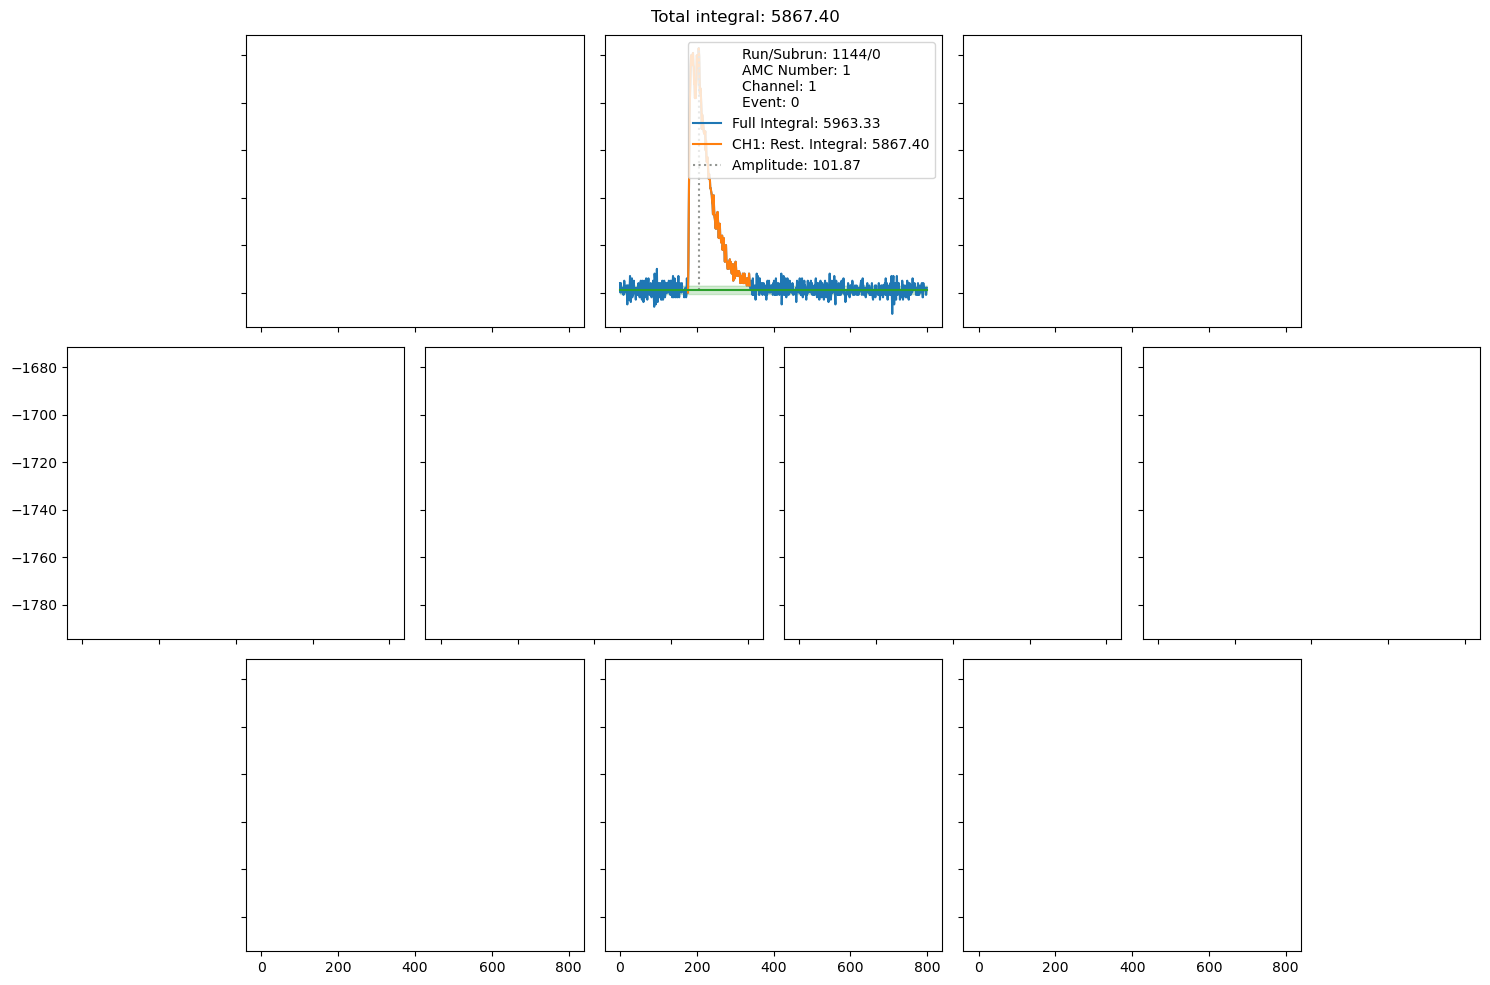

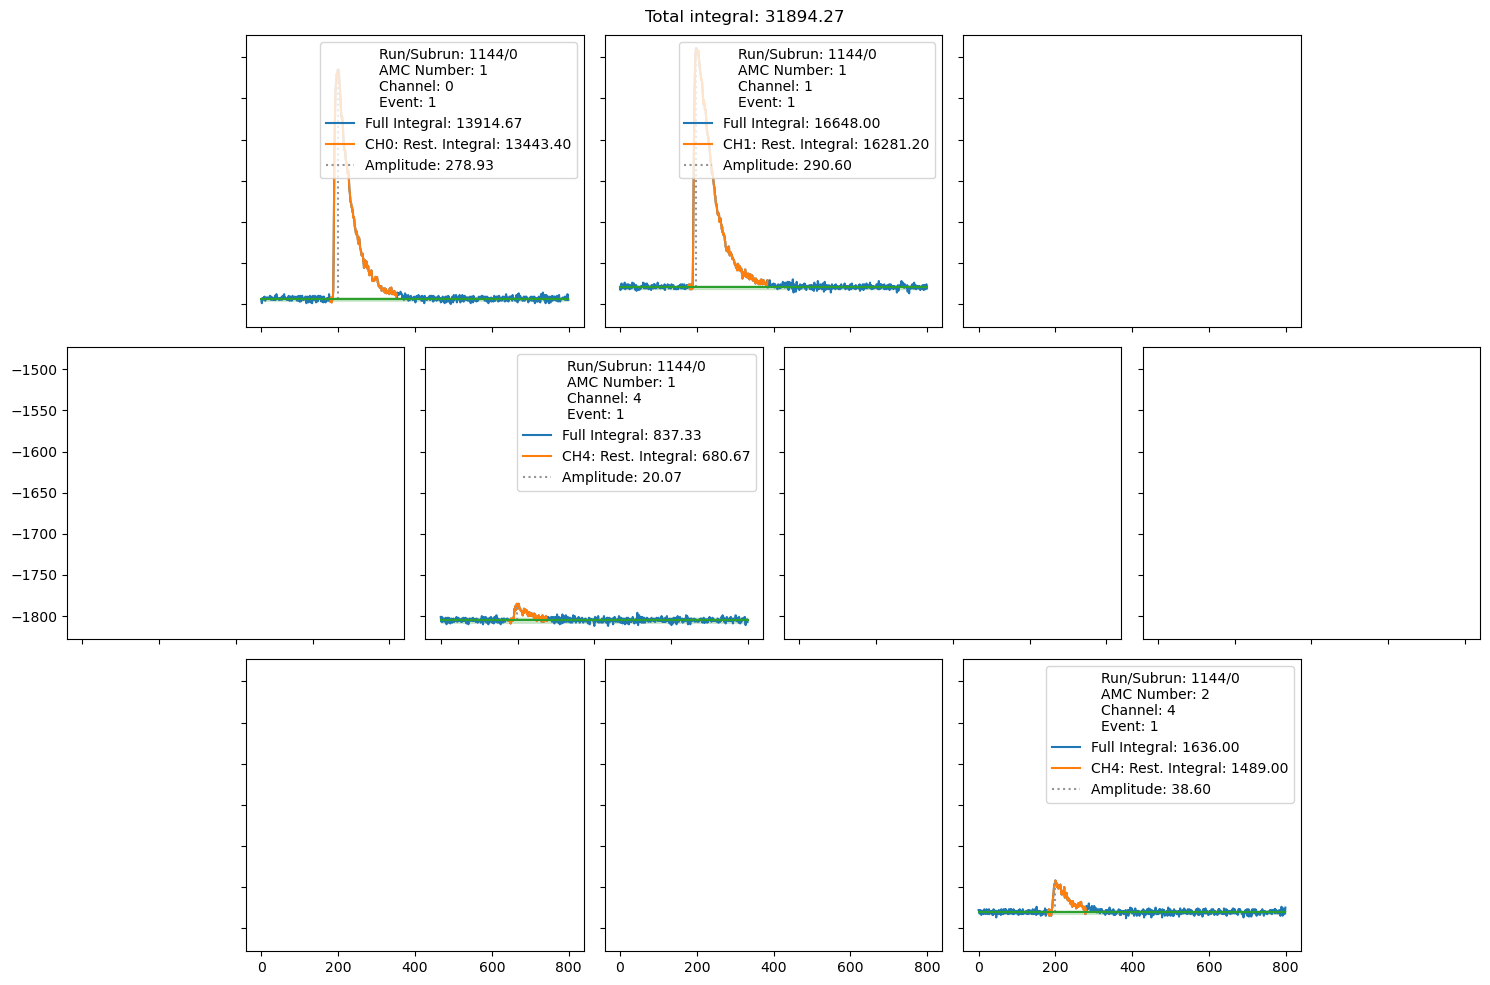

In [7]:
for i in range(nevents):
    ch.GetEvent(i)
    fig,ax = plot_event(ch.lyso_integrals)

# LYSO total integral

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


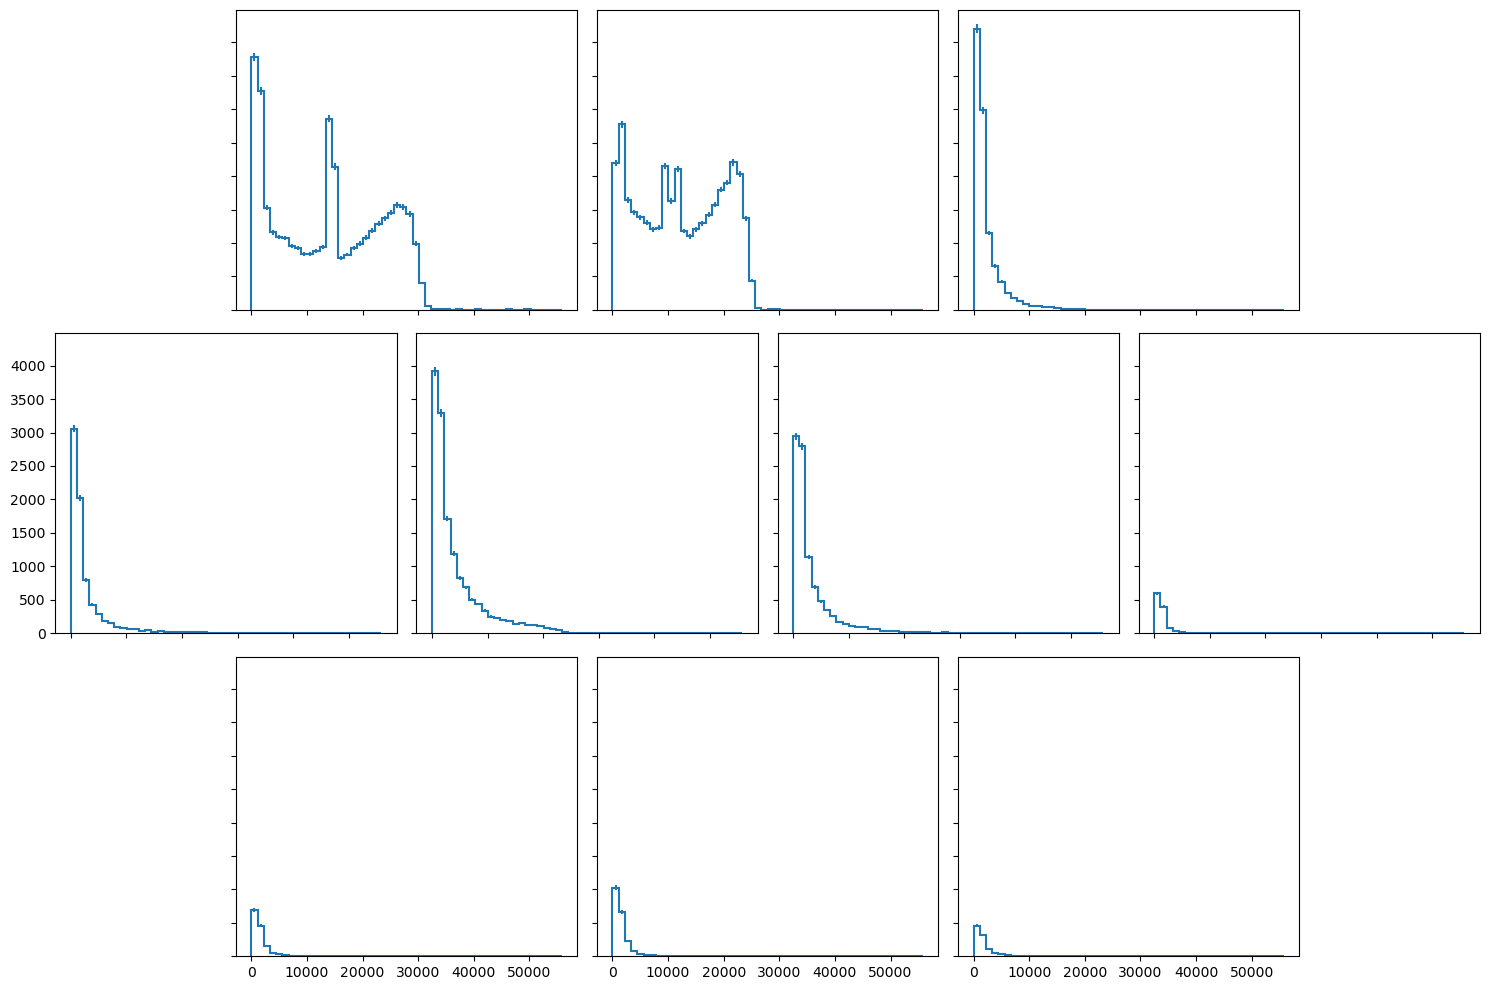

In [8]:
fig,ax = plt.subplot_mosaic(layout_string,figsize=(15,10), sharex=True, sharey=True)

for amc in amcs:
    for channel in channelTags:
        
        maxi = ch.GetMaximum("lyso_integrals.integral")
        hist = r.TH1F("histogram","Histogram of lyso_integrals.integral", 50, 0, maxi)

        ch.Draw("lyso_integrals.integral>>histogram",f"lyso_integrals.amcNum == {amc} && lyso_integrals.channelTag == {channel}")
        #c = r.TCanvas()
        #hist.Draw()
        #c.Draw()
        hi = uproot.from_pyroot(hist).to_hist()
        axi = ax[channel_map[(amc,channel)]]
        hi.plot(ax = axi)
        axi.set_xlabel('')
        #axi.set_yscale('log')
        del hist
        #break
    #break
        
plt.tight_layout()

# Deposited Energies

0.12218524548671096
 FCN=16.4962 FROM MIGRAD    STATUS=CONVERGED     188 CALLS         189 TOTAL
                     EDM=9.59052e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.80999e+03   1.66774e+01   3.85004e-04   1.12600e-05
   2  Mean         3.37058e+04   6.57922e+01  -2.65542e-02  -8.54922e-07
   3  Sigma        4.11836e+03   1.00911e+02  -7.28899e-02   1.63863e-06
   4  Alpha        1.07422e+00   8.49826e-02  -1.18849e-04  -8.14870e-04
   5  N            2.41664e+05   8.86567e+05  -9.14060e+00   6.02619e-12
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


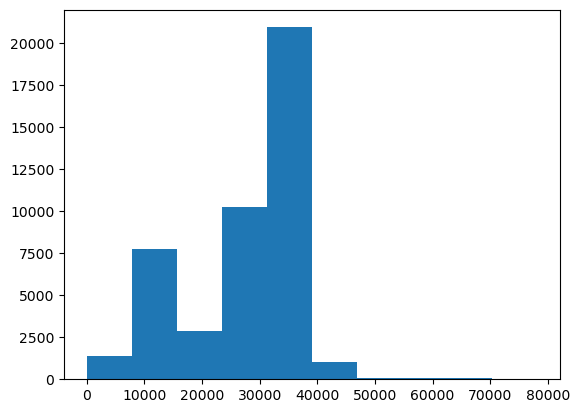

In [13]:
cconstants = np.array([1.0, 0.837028880894004, 0.9194131178675516, 1.0132273191551833, 0.7914482424199095, 1.0333753083796802, 0.6061086684397046, 0.7268400725717552, 0.8121971032025544, 0.8232159841575947])
#cconstants = np.ones(10)
cc_map = {
    (1,0):cconstants[0],
    (1,1):cconstants[1],
    (1,2):cconstants[2],
    (1,3):cconstants[3],
    (1,4):cconstants[4],
    (2,0):cconstants[5],
    (2,1):cconstants[6],
    (2,2):cconstants[7],
    (2,3):cconstants[8],
    (2,4):cconstants[9]
}

maxi = ch.GetMaximum("lyso_integrals.integral")
hist = r.TH1F("histogram","Histogram of the deposited energies", 100, 0, maxi)

summed_integrals = []



for i,event in enumerate(ch):
    summed_integral = 0
    for integral in event.lyso_integrals:
        amc = integral.amcNum
        channel = integral.channelTag
        cconstant = cc_map[(amc,channel)]
        summed_integral += integral.integral/cconstant
    summed_integrals.append(summed_integral)
    hist.Fill(summed_integral)

c = r.TCanvas()
hist.Draw()
c.Draw()
plt.hist(summed_integrals)

leftvalley = 18e3 #maybe this has to change for different energies
rightvalley = 35e3
xmax,maxvalue = GetMaximumInsideRanges(hist,leftvalley,rightvalley) #replace by peakfinder
#print(maxvalue)
#print(xmax)
minfit,maxfit = xmax-6000, xmax + 4000
#gausfit = r.TF1("gausfit","gaus",xmax,maxfit)
crytalballfit = r.TF1("crytalballfit","crystalball",minfit,maxfit)
crytalballfit.SetParameters(maxvalue,xmax,2800,0.3,80000)

#hist.Fit("gausfit", "R")
_ = hist.Fit("crytalballfit", "LR")
#_ = hist.Fit("crytalballfit", "LR")
#_ = hist.Fit("crytalballfit", "LR")
sigma = crytalballfit.GetParameter(2)
peak = crytalballfit.GetParameter(1)
print(sigma / peak)



#python3 fwefs.py(startrun, )

# Linearity of the PMTs

Warning in <TFile::Init>: file /home/pioneer/dqm/nearline/nearline_hists_run01623_00080.root probably not closed, trying to recover
Info in <TFile::Recover>: /home/pioneer/dqm/nearline/nearline_hists_run01623_00080.root, recovered key vector<dataProducts::ChannelConfig>:channelConfigs at address 318
Info in <TFile::Recover>: /home/pioneer/dqm/nearline/nearline_hists_run01623_00080.root, recovered key dataProducts::ODB:odb at address 2390
Info in <TFile::Recover>: /home/pioneer/dqm/nearline/nearline_hists_run01623_00080.root, recovered key TProcessID:ProcessID0 at address 33779
Info in <TFile::Recover>: /home/pioneer/dqm/nearline/nearline_hists_run01623_00080.root, recovered key TTree:tree at address 61855539
Warning in <TFile::Init>: successfully recovered 4 keys
Warning in <TFile::Init>: file /home/pioneer/dqm/nearline/nearline_hists_run01623_00080.root probably not closed, trying to recover
Info in <TFile::Recover>: /home/pioneer/dqm/nearline/nearline_hists_run01623_00080.root, recov

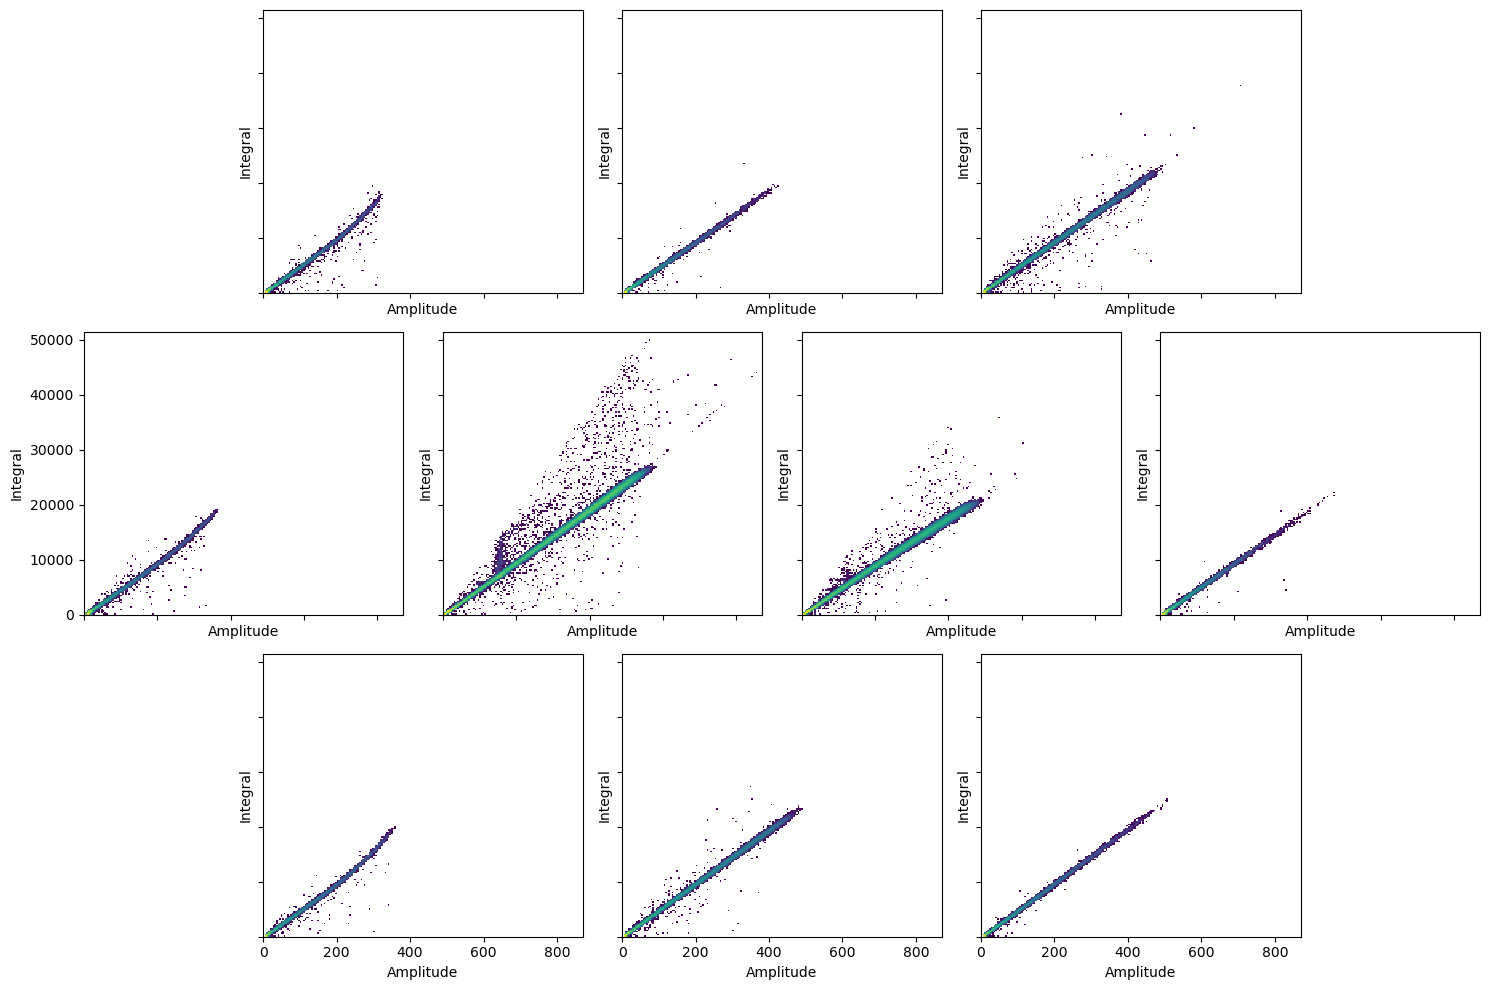

In [6]:
fig,ax = plt.subplot_mosaic(layout_string,figsize=(15,10), sharex=True, sharey=True)

for amc in amcs:
    for channel in channelTags:
        
        maxx,maxy = ch.GetMaximum("lyso_integrals.amplitude"), ch.GetMaximum("lyso_integrals.integral")
        hist = r.TH2F("histogram","linearity histogram", 200, 0, maxx,200,0,maxy)

        ch.Draw("lyso_integrals.integral:lyso_integrals.amplitude>>histogram",f"lyso_integrals.amcNum == {amc} && lyso_integrals.channelTag == {channel}")
        
        hi = uproot.from_pyroot(hist).to_hist()
        axi = ax[channel_map[(amc,channel)]]
        hi.plot(ax = axi,norm = 'log', cbar = False)
        axi.set_xlabel('Amplitude')
        axi.set_ylabel('Integral')
        del hist
        #break
    #break
        
plt.tight_layout()

# Hodoscope hit positions

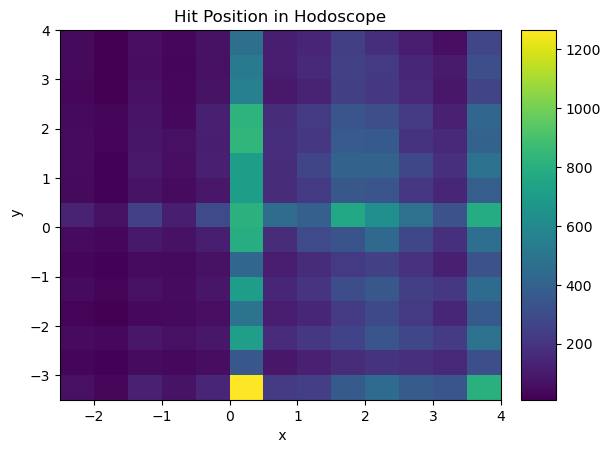

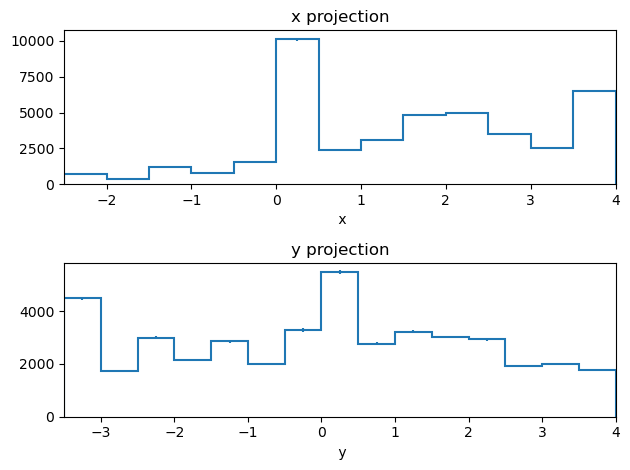

In [17]:

hhp_sum = None

files = ch.GetListOfFiles()
for TChainEl in files:
    current_file = r.TFile.Open(TChainEl.GetTitle())

    # Access the histogram from the file
    hist_hhp = current_file.Get("hists/positions/hodoscope_hit_positions")

    # If it's the first file, clone the histogram to sum_histogram
    if not hhp_sum:
        hhp_sum = hist_hhp.Clone("hhp_sum")
        
        #Don't delete the Histogram after closing the file
        hhp_sum.SetDirectory(0)
    else:
        # Add the current histogram to sum_histogram
        hhp_sum.Add(hist_hhp)

    # Close the current file
    current_file.Close()


# Project onto the X-axis
projection_x = hhp_sum.ProjectionX()

# Project onto the Y-axis
projection_y = hhp_sum.ProjectionY()


#c = r.TCanvas()
#hhp_sum.Draw("colz")
#c.Draw()

hi = uproot.from_pyroot(hhp_sum).to_hist()
hix = uproot.from_pyroot(projection_x).to_hist()
hiy = uproot.from_pyroot(projection_y).to_hist()


hi.view()[hi.view() == 0] = np.nan

hi.plot()
plt.title("Hit Position in Hodoscope")
plt.xlim(-2.5,4)
plt.ylim(-3.5,4)
plt.show()

fig,ax = plt.subplots(2)
hix.plot(ax = ax[0])
ax[0].set_xlim(-2.5,4)
ax[0].set_title("x projection")

hiy.plot(ax = ax[1])
ax[1].set_xlim(-3.5,4)
ax[1].set_title("y projection")
fig.tight_layout()
plt.show()


#del hhp_sum
#del current_file

In [11]:
#fig,ax = plt.subplots(1,nplots,sharey = True,figsize = (6.4*nplots,4.8))
"""
for entry in range(entries):
    ch.GetEntry(entry)
    ws = ch.waveforms_corr
    for i,w in enumerate(ws):
        print(i)
        if i >= nevents:
            break    
        fig,ax = plot_pulse_fit(w,ch)
        fig.show()

    break"""

'\nfor entry in range(entries):\n    ch.GetEntry(entry)\n    ws = ch.waveforms_corr\n    for i,w in enumerate(ws):\n        print(i)\n        if i >= nevents:\n            break    \n        fig,ax = plot_pulse_fit(w,ch)\n        fig.show()\n\n    break'

In [16]:
hodoscope_hit_positions = r.TH2F("hodoscope_hit_positions", "Hit Position in Hodoscope; x; y;", 100,-25,25,100,-25,25);

for i,event in enumerate(ch):
    for j,v in enumerate(event.hodoscope):
        if(not v.containsNegativeIntegrals):
            hodoscope_hit_positions.Fill(v.x, v.y)
        #if v.x < -2.5:
        #    print(v.x,v.y,i,j)
c = r.TCanvas()
hodoscope_hit_positions.Draw("colz")
#ch.Draw("hodoscope.y:hodoscope.x","","colz")
c.Draw()



Warning in <TROOT::Append>: Replacing existing TH1: hodoscope_hit_positions (Potential memory leak).


-47.49999999998545
-31.666666666656965


(<Figure size 640x480 with 1 Axes>, <Axes: >)

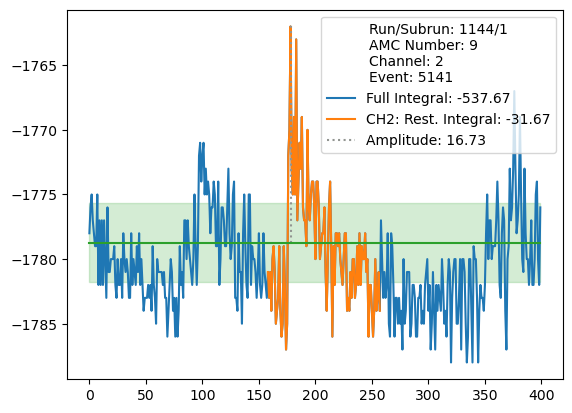

In [12]:
ch.GetEntry(5141)
print(ch.hodoscope[0].x)
print(ch.hodoscope[0].integral_x)

plot_integral(ch.hodo_x_integrals[0])
